# Decision Trees

https://scikit-learn.org/stable/modules/tree.html

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features -- to find the sequence of questions that has the best accuracy at classifying the data in the fewest steps.

**Classification Trees** Target variable is categorical, identify the “class” target variable may belong to.

**Regression Trees** Target variable is continuous and tree is used to predict its value.

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree

#### Iris Dataset

Iris is a multivariate data set. The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters. 

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

data dictionary: https://archive.ics.uci.edu/ml/datasets/iris

Here we create a decision tree to predict which class an observation is likely to fall into using the `DecisionTreeClassifier` from the `sklearn.Tree` library. 

In [3]:
iris = load_iris()
features = ['sepal length','sepal width','petal length','petal width']

In [4]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
type(iris.data), len(iris.data)

(numpy.ndarray, 150)

In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

In [6]:
print ('When full dataset is used for training, feature importance:')
print ('\t%s:%.2f%%' % (features[0],clf.feature_importances_[0]*100))
print ('\t%s:%.2f%%' % (features[1],clf.feature_importances_[1]*100))
print ('\t%s:%.2f%%' % (features[2],clf.feature_importances_[2]*100))
print ('\t%s:%.2f%%' % (features[3],clf.feature_importances_[3]*100))
print ('Train score: %.2f'% clf.score(X=iris.data, y=iris.target)) 

When full dataset is used for training, feature importance:
	sepal length:1.33%
	sepal width:0.00%
	petal length:56.41%
	petal width:42.26%
Train score: 1.00


In [23]:
clf.score(X=iris.data, y=iris.target)

1.0

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    iris.data,
    iris.target,
    test_size=0.25,
    random_state=3)

In [8]:
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
print ('When 75% of the dataset is used for training, feature importance:')
print ('\t%s:%.2f%%' % (features[0],clf.feature_importances_[0]*100))
print ('\t%s:%.2f%%' % (features[1],clf.feature_importances_[1]*100))
print ('\t%s:%.2f%%' % (features[2],clf.feature_importances_[2]*100))
print ('\t%s:%.2f%%' % (features[3],clf.feature_importances_[3]*100))
print ('Train score: %.4f'% clf.score(X=X_train, y=y_train)) 
print ('Test score: %.4f'% clf.score(X=X_test, y=y_test)) # 1.0

When 75% of the dataset is used for training, feature importance:
	sepal length:0.00%
	sepal width:1.79%
	petal length:55.98%
	petal width:42.23%
Train score: 1.0000
Test score: 0.9737


[Text(133.92000000000002, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(100.44000000000001, 90.6, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(133.92000000000002, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.840000000000

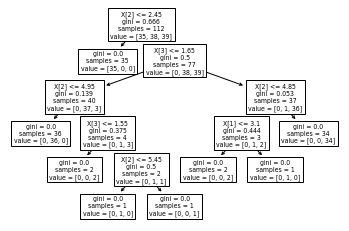

In [9]:
tree.plot_tree(clf)

[Text(133.92000000000002, 199.32, 'X[2] <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [35, 38, 39]'),
 Text(100.44000000000001, 163.07999999999998, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(167.40000000000003, 163.07999999999998, 'X[3] <= 1.65\ngini = 0.5\nsamples = 77\nvalue = [0, 38, 39]'),
 Text(66.96000000000001, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.139\nsamples = 40\nvalue = [0, 37, 3]'),
 Text(33.480000000000004, 90.6, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(100.44000000000001, 90.6, 'X[3] <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(66.96000000000001, 54.359999999999985, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(133.92000000000002, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(167.40000000000003, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(267.840000000000

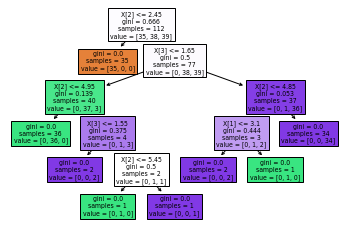

In [10]:
tree.plot_tree(clf,filled=True)

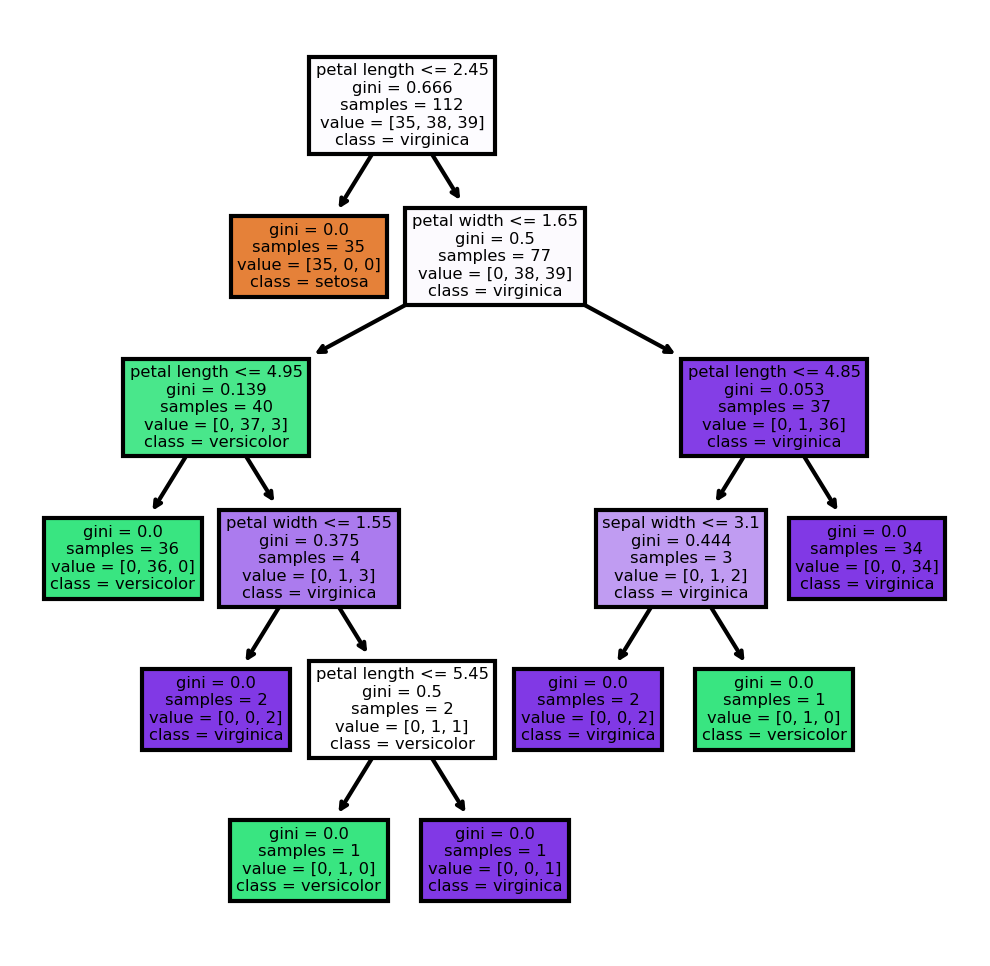

In [11]:
import matplotlib.pyplot as plt
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = features, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')

### Understanding how we use a Decision Tree

- The **root** or topmost node of the tree (and there is only one root) is the decision node that splits the dataset using a variable or feature that results in the the best **splitting metric** evaluated for each subset or class in the dataset that results from the split.

- The decision tree learns by recursively splitting the dataset from the root onwards (in a greedy, node by node manner) according to the **splitting metric** at each decision node.

- The **terminal nodes** are reached when the splitting metric is at a global extremum.

- Popular splitting metrics include the minimizing the **Gini Impurity** (default in DecisionTreeClassifier, CART) or maximizing the **Information Gain** (used by ID3, C4.5).

Decision Tree algorithm selects features such that the uncertainity is reduced the most, this is accomplished by computing the importance of each feature, which lends itself to the right question to ask. 

**Gini Impurity** is a probablity, defined to measure the quality of a split (how often we'd have FP & FN); lower the better.

**pure node** if has only 1 class in the node (gini=0), **mixed node** otherwise.

**value list** gives the number of samples of each class that end up at this leaf node during training. 

**Advantages**: easy to understand and interpret, visualize. numerical and categorical data (no missing values), validation using statistical tests.

**Disadvantages**: over-fitting, np-hard, class-domination might occur (use balanced datasets).



In [12]:
# copied from top
clf = tree.DecisionTreeClassifier()
clf.fit(X=X_train, y=y_train)
print ('When 75% of the dataset is used for training, feature importance:')
print ('\t%s:%.2f%%' % (features[0],clf.feature_importances_[0]*100))
print ('\t%s:%.2f%%' % (features[1],clf.feature_importances_[1]*100))
print ('\t%s:%.2f%%' % (features[2],clf.feature_importances_[2]*100))
print ('\t%s:%.2f%%' % (features[3],clf.feature_importances_[3]*100))
print ('Train score: %.4f'% clf.score(X=X_train, y=y_train)) 
print ('Test score: %.4f'% clf.score(X=X_test, y=y_test)) # 1.0

When 75% of the dataset is used for training, feature importance:
	sepal length:0.67%
	sepal width:1.79%
	petal length:54.64%
	petal width:42.90%
Train score: 1.0000
Test score: 0.9737


Notice that the training data here is predicted perfectly with an *accuracy of 1.0*. While the test data is a little bit worse. This is an indication that the tree is likely **overfitting** and in fact this is a problem with building decision trees in general that keep adding rules until the leafnodes are pure.

#### Pre-Pruning (`max_depth`/`max_leaf_nodes`/`min_samples_leaf`):
One strategy to prevent overfitting is to prevent the tree from becoming really detailed and complex by stopping its growth early. This is called pre-pruning.

We could also set a threshold on the minimum number of instances that must be in a node to consider splitting it. And this would be using the min samples leaf parameter we can see the effect of pre-pruning by setting max depth to three on the iris dataset.

In [13]:
# change max_depth
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X=X_train, y=y_train)
print ('When 75% of the dataset is used for training, feature importance:')
print ('\t%s:%.2f%%' % (features[0],clf.feature_importances_[0]*100))
print ('\t%s:%.2f%%' % (features[1],clf.feature_importances_[1]*100))
print ('\t%s:%.2f%%' % (features[2],clf.feature_importances_[2]*100))
print ('\t%s:%.2f%%' % (features[3],clf.feature_importances_[3]*100))
print ('Train score: %.4f'% clf.score(X=X_train, y=y_train)) 
print ('Test score: %.4f'% clf.score(X=X_test, y=y_test)) # 1.0

When 75% of the dataset is used for training, feature importance:
	sepal length:0.00%
	sepal width:0.00%
	petal length:6.50%
	petal width:93.50%
Train score: 0.9821
Test score: 0.9737


 Now the accuracy on the training data is slightly worse but the accuracy on the test data is slightly better.

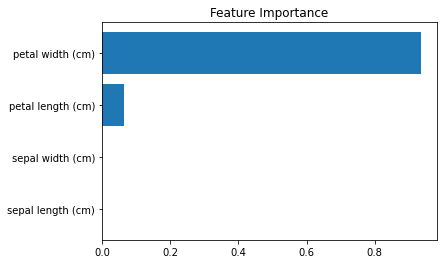

In [14]:
import numpy as np
from matplotlib import pyplot as plt
# Sort feature importances
indices = np.argsort(clf.feature_importances_)
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices]
# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.barh(range(X_train.shape[1]), clf.feature_importances_[indices])
# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]), names, rotation=0)
# Show plot
plt.show()